# Ramsey King
# DSC 540 - Data Preparation
# Week 3 & 4 Assignment
# July 3, 2021

## Data Wrangling with Python: Activity 5 (pg 116)

In [72]:
# 1. Load the ncessary libraries.
# 2. Read in the Boston housing dataset (given as a .csv file) from the local directory.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

boston_data = pd.read_csv('Boston.csv', sep=",")


#### The dataset columns described as found at https://www.kaggle.com/prasadperera/the-boston-housing-dataset:

- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town.
- CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per \\$10,000
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in $1000's

In [73]:
# 3. Check the first 10 records.  Find the total number of records.
print(boston_data.head(10))
print(len(boston_data))



   Unnamed: 0     crim    zn  indus  chas    nox     rm    age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3   
5           6  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3   
6           7  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5   
7           8  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5   
8           9  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5   
9          10  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17

In [74]:
# 4. Create a smaller DataFrame with columns that DO NOT include CHAS, NOX, B, and LSTAT.
# 5. Check the last seven records of the new DataFrame you just created.

small_boston_data = boston_data.drop(columns=['chas', 'nox', 'black', 'lstat', 'Unnamed: 0'])
print(small_boston_data.tail(7))



        crim   zn  indus     rm   age     dis  rad  tax  ptratio  medv
499  0.17783  0.0   9.69  5.569  73.5  2.3999    6  391     19.2  17.5
500  0.22438  0.0   9.69  6.027  79.7  2.4982    6  391     19.2  16.8
501  0.06263  0.0  11.93  6.593  69.1  2.4786    1  273     21.0  22.4
502  0.04527  0.0  11.93  6.120  76.7  2.2875    1  273     21.0  20.6
503  0.06076  0.0  11.93  6.976  91.0  2.1675    1  273     21.0  23.9
504  0.10959  0.0  11.93  6.794  89.3  2.3889    1  273     21.0  22.0
505  0.04741  0.0  11.93  6.030  80.8  2.5050    1  273     21.0  11.9


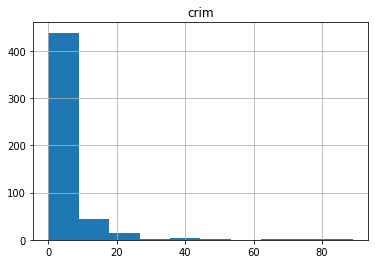

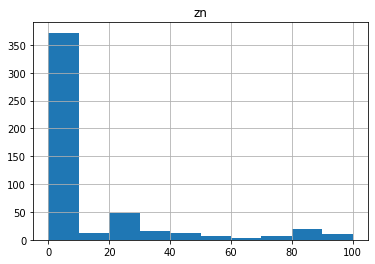

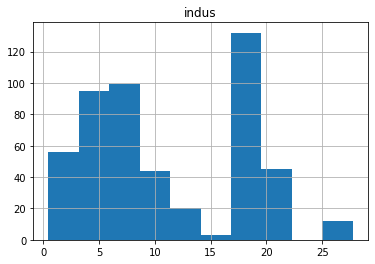

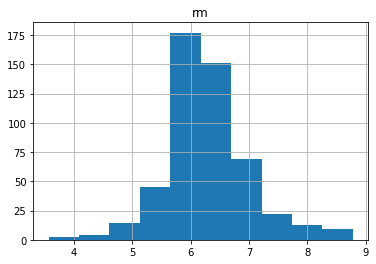

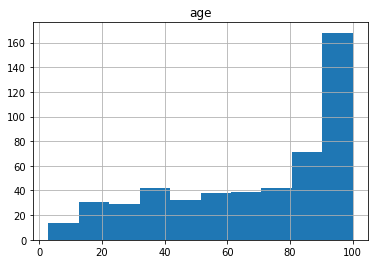

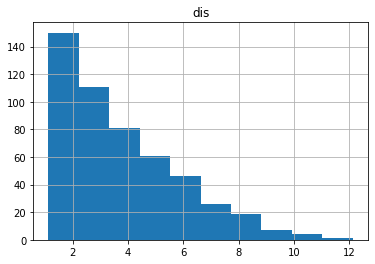

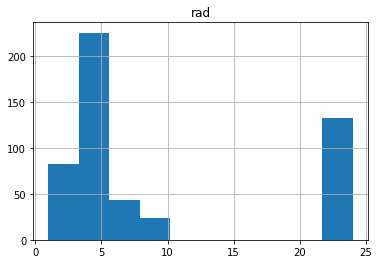

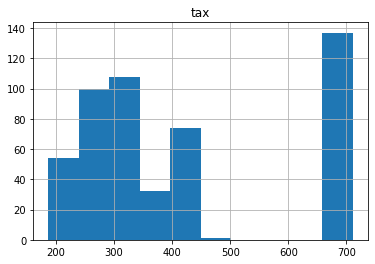

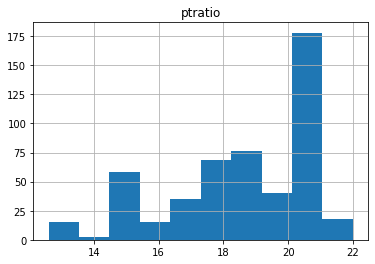

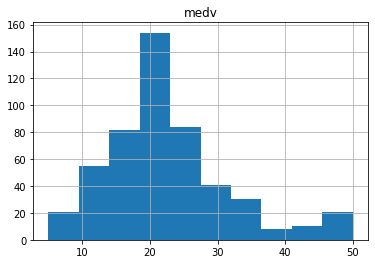

In [75]:
# 6. Plot the histograms of all the variable (columns) in the new DataFrame
# 7. Plot them all at once using a for loop.  Try to add a unique title to a plot.

for column in small_boston_data.columns:
    small_boston_data[column].hist()
    plt.title(column)
    plt.show()



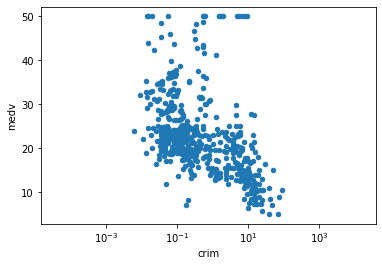

In [76]:
# 8. Create a scatter plot of crime rate versus price.
# 9. Plot using log10 (crime) versus price.
small_boston_data.plot.scatter('crim', 'medv', logx=True)
plt.show()

In [77]:
# 10. Calculate some useful statistics, such as mean rooms per dwelling, median age, mean distances to five Boston
# employment centers, and the percentage of houses with a low price (< $20,000).

print('The mean rooms per dwelling is', small_boston_data['rm'].mean())
print('The median home age is', small_boston_data['age'].median())
print('The mean distances to the five Boston employment centers is', small_boston_data['dis'].mean())
print('The percentage of houses with a low price (< $20,000) is', 
      "{:.2%}".format(len(small_boston_data[(small_boston_data['medv'] < 20)])/len(small_boston_data['medv'])))

   

The mean rooms per dwelling is 6.284634387351787
The median home age is 77.5
The mean distances to the five Boston employment centers is 3.795042687747034
The percentage of houses with a low price (< $20,000) is 41.50%


## Data Wrangling with Python: Activity 6 (pg 171)

In [78]:
'''
1. Load the necessary libraries.
2. Read the adult income dataset from the following URL: 
    https://github.com/TrainingByPackt/Data-Wrangling-with-Python/blob/master/Chapter04/Activity06/.
3. Create a script that will read a text file line by line. (The text file contains the header names.)
4. Add a name of Income for the response variable to the dataset.
'''
adult_income_data = pd.read_csv('https://raw.githubusercontent.com/TrainingByPackt/Data-Wrangling-with-Python/master/Lesson04/Activity06/adult_income_data.csv', sep=",")
header_list = []
with open("adult_income_names.txt", "r") as fd:    
    for line in fd:        
        column_list = line.split(":")
        header_list.append(column_list[0])
        
    header_list = [i for i in header_list if i != '\n']
    
header_list.append('Income')
adult_income_data.columns = header_list


In [79]:
# 5. Find the missing values.
for c in adult_income_data.columns:
    miss = adult_income_data[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))
    else:
        print("{} has no missing values.".format(c))


age has no missing values.
workclass has no missing values.
fnlwgt has no missing values.
education has no missing values.
education-num has no missing values.
marital-status has no missing values.
occupation has no missing values.
relationship has no missing values.
sex has no missing values.
capital-gain has no missing values.
capital-loss has no missing values.
hours-per-week has no missing values.
native-country has no missing values.
Income has no missing values.


In [80]:
# 6. Create a DataFrame with only age, education, and occupation by using subsetting.
adult_income_subset = adult_income_data[['age', 'education', 'occupation']]
adult_income_subset.head()

,age,education,occupation
0,50,Bachelors,Exec-managerial
1,38,HS-grad,Handlers-cleaners
2,53,11th,Handlers-cleaners
3,28,Bachelors,Prof-specialty
4,37,Masters,Exec-managerial


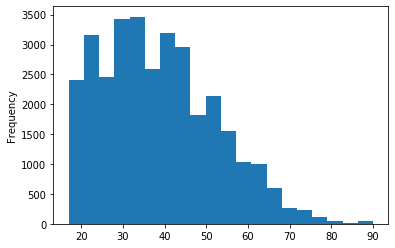

In [81]:
# 7. Plot a histogram of age with a bin size of 20.
adult_income_subset['age'].plot.hist(bins=20)


In [82]:
# 8. Create a function to strip the whitespace characters.
def white_space_strip(column):
    return column.strip()


In [83]:
'''
9. Use the apply method to apply this function to all the columns with string values, create a new column, 
copy the values from this new column to the old column, and drop the new column.
'''
# education
adult_income_subset['education_copy'] = adult_income_subset['education'].apply(white_space_strip)
adult_income_subset['education'] = adult_income_subset['education_copy']


# occupation
adult_income_subset['occupation_copy'] = adult_income_subset['occupation'].apply(white_space_strip)
adult_income_subset['occupation'] = adult_income_subset['occupation_copy']

# dropping the created columns
print(adult_income_subset.columns)
del adult_income_subset['occupation_copy']
del adult_income_subset['education_copy']
print(adult_income_subset.columns)


Index(['age', 'education', 'occupation', 'education_copy', 'occupation_copy'], dtype='object')
Index(['age', 'education', 'occupation'], dtype='object')


C:\Users\Ramsey\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ramsey\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Ramsey\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [84]:
# 10.  Find the number of people who are aged between 30 and 50.
print('The number of people between the ages of 30 and 50 is', 
      len(adult_income_subset[(adult_income_subset['age'] >= 30) & (adult_income_subset['age']<=50)]))


The number of people between the ages of 30 and 50 is 16389


In [85]:
# 11. Group the records based on age and education to find how the mean age is distributed.
adult_income_subset.pivot_table(values=['age'], index=['education'],aggfunc='mean')


,age
education,
10th,37.429796
11th,32.355745
12th,32.000000
1st-4th,46.142857
5th-6th,42.885886
7th-8th,48.445820
9th,41.060311
Assoc-acdm,37.381443
Assoc-voc,38.553546


In [86]:
'''
12. Group by occupation and show the summary statistics of age.  
Find which profession has the oldest workers on average and which profession has its largest share of the workforce
above the 75th percentile
'''
by_occupation = adult_income_subset.groupby('occupation')
by_occupation.describe()

# The profession with the oldest workers on average is Exec-managerial with a mean of 42.16.
# The profession with its largest share of the workforce above the 75th percentile is the unknown category.  
# The known category with its largest share above the 75th percentile is the Priv-house-serv category.



age                                                    
                    count       mean        std   min   25%   50%   75%   max
occupation                                                                   
?                  1843.0  40.882800  20.336350  17.0  21.0  35.0  61.0  90.0
Adm-clerical       3769.0  36.963916  13.364730  17.0  26.0  35.0  46.0  90.0
Armed-Forces          9.0  30.222222   8.089774  23.0  24.0  29.0  34.0  46.0
Craft-repair       4099.0  39.031471  11.606436  17.0  30.0  38.0  47.0  90.0
Exec-managerial    4066.0  42.169208  11.974548  17.0  33.0  41.0  50.0  90.0
Farming-fishing     994.0  41.211268  15.070283  17.0  29.0  39.0  52.0  90.0
Handlers-cleaners  1370.0  32.165693  12.372635  17.0  23.0  29.0  39.0  90.0
Machine-op-inspct  2002.0  37.715285  12.068266  17.0  28.0  36.0  46.0  90.0
Other-service      3295.0  34.949621  14.521508  17.0  22.0  32.0  45.0  90.0
Priv-house-serv     149.0  41.724832  18.633688  17.0  24.0  40.0  57.0  81.0
Prof-specialty     4140.0  40.517633  12.016676  17.0  31.0  40.0  48.0  90.0
Protective-serv     649.0  38.953775  12.822062  17.0  29.0  36.0  47.0  90.0
Sales              3650.0  37.353973  14.186352  17.0  25.0  35.0  47.0  90.0
Tech-support        928.0  37.022629  11.316594  17.0  28.0  36.0  44.0  73.0
Transport-moving   1597.0  40.197871  12.450792  17.0  30.0  39.0  49.0  90.0

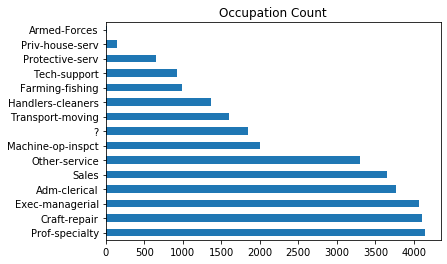

In [87]:
# 13. Use subset and grouby to find outliers.
# 14. Plot the values on a bar chart.
adult_income_subset['occupation'].value_counts().plot.barh()
plt.title("Occupation Count")
plt.show()

# It appears that the count of Armed-Forces and Priv-house-serv are fairly low in comparison to the number of other
# occupants.  If I were to do analysis on this data set, I would exclude these two categories (as well as the ? category).

In [88]:
# 15. Merge the data using common keys.

'''
# For this problem, I am going to split the original data set into 2 separate, with the common key being an ID number
# that will be created.
# After splitting the two data sets, I will merge them back together.
'''
adult_income_data.insert(0, 'ID_num', range(len(adult_income_data)))

aid_one = adult_income_data[['ID_num', 'age', 'workclass', 'fnlwgt', 'education', 
                             'education-num', 'marital-status', 'occupation']]

aid_two = adult_income_data[['ID_num', 'relationship', 'sex', 'capital-gain', 
                             'capital-loss', 'hours-per-week', 'native-country', 'Income']]

original_aid = pd.merge(aid_one, aid_two, on='ID_num', how='left').drop_duplicates()


## Create a series and practice basic arithmetic steps

In [89]:
'''
a. Series 1 = 7.3, -2.5, 3.4, 1.5
i. Index = ‘a’, ‘c’, ‘d’, ‘e’
b. Series 2 = -2.1, 3.6, -1.5, 4, 3.1
i. Index = ‘a’, ‘c’, ‘e’, ‘f’, ‘g’
c. Add Series 1 and Series 2 together and print the results
d. Subtract Series 1 from Series 2 and print the results
'''
series_one = pd.Series([7.3, -2.5, 3.4, 1.5], index = ['a', 'c', 'd', 'e'])
series_two = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index = ['a', 'c', 'e', 'f', 'g'])

print(series_one.add(series_two))
print()
print(series_one.subtract(series_two))

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

a    9.4
c   -6.1
d    NaN
e    3.0
f    NaN
g    NaN
dtype: float64


## Data Wrangling with Python: Activity 7 (pg 207)
### Reading Tabular Data from a Web Page and Creating DataFrames

In [90]:
'''
1. Open the page in a separate Chrome tab and use something like an Inspect Element tool to view the source HTML
and understand its structure.
2. Read the page using bs4.
'''
from bs4 import BeautifulSoup
import requests

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
webpage_contents = requests.get(url).text

soup = BeautifulSoup(webpage_contents)

In [91]:
'''
3. Find the table structure you will need to deal with (how many tables are there?)
4. find the right table using bs4
5. Separate the source names and their corresponding data
'''
num_tables = soup.find_all('table')
print('The total number of <table> = {}'.format(len(num_tables)))
table = soup.find('table', attrs={'class':'wikitable'})

table_data = table.tbody.find_all('th')

headings = []
for th in table_data:
    headings.append(th.text.strip())
    
print(headings)



The total number of <table> = 7
['Country (or territory)', 'Subregion', 'Region', 'IMF[1]', 'UN[12]', 'World Bank[13]', 'GDP', 'Year', 'GDP', 'Year', 'GDP', 'Year']


In [92]:
'''
6. Get the source names from the list of sources you have created
7.  Separate the header and data from the data that you separated before for the first source only, and then create
    a DataFrame using that
8.  Repeat the last task for the other two data sources.
'''
table_info = table.tbody.find_all('tr')
data = []
for td in table_info:
    data.append(td.text.split('\n'))

chars = '\xa0'
symbol = '†'
n_3 = '[n 3]'
n_2 = '[n 2]'
n_5 = '[n 5]'


for i in range(len(data)):
    data[i] = [a for a in data[i] if a]
    data[i] = [a.replace(chars,"") for a in data[i] if a]
    data[i] = [a.replace(symbol,"") for a in data[i] if a]
    data[i] = [a.replace(n_3,"") for a in data[i] if a]
    data[i] = [a.replace(n_2,"") for a in data[i] if a]
    data[i] = [a.replace(n_5,"") for a in data[i] if a]

    
big_df = pd.DataFrame(data[3:], columns=[headings[0], headings[1], headings[2], headings[6], headings[7], 
                                    headings[8], headings[9], headings[10], headings[11]])
    
imf_df = big_df.iloc[:, 0:5]
un_df = big_df.iloc[:, [0,1,2,5,6]]
world_bank_df = big_df.iloc[:, [0,1,2,7,8]]

print(imf_df.head())
print()
print(un_df.head())
print()
print(world_bank_df.head())

  Country (or territory)         Subregion    Region         GDP  Year
0          United States  Northern America  Americas  22,675,271  2021
1                  China      Eastern Asia      Asia  16,642,318  2021
2                  Japan      Eastern Asia      Asia   5,378,136  2021
3                Germany    Western Europe    Europe   4,319,286  2021
4         United Kingdom   Northern Europe    Europe   3,124,650  2021

  Country (or territory)         Subregion    Region         GDP  Year
0          United States  Northern America  Americas  21,433,226  2020
1                  China      Eastern Asia      Asia  14,342,933  2020
2                  Japan      Eastern Asia      Asia   5,082,465  2020
3                Germany    Western Europe    Europe   3,861,123  2020
4         United Kingdom   Northern Europe    Europe   2,826,441  2020

  Country (or territory)         Subregion    Region         GDP  Year
0          United States  Northern America  Americas  21,433,226  2019
1   

## Data Wrangling with Python: Activity 8 (pg 233)
### Handling Outliers and Missing Data

In [95]:
'''
1. Read the visit_data.csv file
2. Check for duplicates.
'''
visit_data = pd.read_csv('visit_data.csv', sep=",")
# print(visit_data.head())

duplicates = visit_data[visit_data.duplicated(['first_name', 'last_name', 'email'])]

print(duplicates)

Empty DataFrame
Columns: [id, first_name, last_name, email, gender, ip_address, visit]
Index: []


In [96]:
'''
3. Check if any essential column contains NaN
'''
for c in visit_data.columns:
    miss = visit_data[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s).".format(c,miss))
    else:
        print("{} has no missing values.".format(c))


id has no missing values.
first_name has 296 missing value(s).
last_name has 296 missing value(s).
email has no missing values.
gender has 505 missing value(s).
ip_address has no missing values.
visit has 26 missing value(s).


{'whiskers': [<matplotlib.lines.Line2D at 0x245746def48>,
 'caps': [<matplotlib.lines.Line2D at 0x245746e5c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x245746de908>],
 'medians': [<matplotlib.lines.Line2D at 0x245746e5dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x245746ebc88>],
 'means': []}

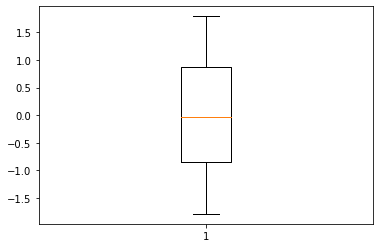

In [116]:
'''
4. Get rid of the outliers.
5. Report the size difference.
6. Create a box plot to check for outliers.
7. Get rid of any outliers.
'''
print(visit_data.shape)
from scipy import stats


z_score = stats.zscore(visit_data['visit'].dropna())
#print(z_score)
plt.boxplot(z_score)

## Insert data into a SQL Lite database – create a table with the following data (Hint: Python for Data Analysis page 191 - 33% - location 6585):

In [118]:
'''
a. Name, Address, City, State, Zip, Phone Number
b. Add at least 10 rows of data and submit your code with a query generating your results.
'''
import sqlite3
query = """ CREATE TABLE test
    (a VARCHAR(40), b VARCHAR(40),
     c VARCHAR(40), d VARCHAR(2),
     e INTEGER, f VARCHAR(15)
    );"""
con = sqlite3.connect('phonebook.sqlite')
con.execute(query)
con.commit()

In [ ]:
data = [('John Doe', '123 Easy St', 'Florence', 'AL', 35360, '938-555-1234'),
       ('Jane Doe', '456 Medium St', 'Florence', 'SC', 29502, '843-555-4567'),
       ('John Smith', '12312 Hard St', 'Florence', 'CA', 35252, '256-123-4567'),
       ('John Doe', '123 Easy St', 'Florence', 'CO', 35252, '256-123-4567'),
       ('John Doe', '123 Easy St', 'Florence', 'KS', 35252, '256-123-4567'),
       ('John Doe', '123 Easy St', 'Florence', 'KY', 35252, '256-123-4567'),
       ('John Doe', '123 Easy St', 'Florence', 'LA', 35252, '256-123-4567'),
       ('John Doe', '123 Easy St', 'Florence', 'MD', 35252, '256-123-4567'),
       ('John Doe', '123 Easy St', 'Florence', 'MS', 35252, '256-123-4567'),
       ('John Doe', '123 Easy St', 'Florence', 'NE', 35252, '256-123-4567'),]